In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split as tts

In [2]:
imgs = np.load('/content/drive/MyDrive/Fetal_experiments/CRL_Sagital/CRL_Sagital_c1tp_imgs.npy')
gc = np.load('/content/drive/MyDrive/Fetal_experiments/CRL_Sagital/CRL_Sagital_c1tp_gc.npy')
ogc = np.load('/content/drive/MyDrive/Fetal_experiments/CRL_Sagital/CRL_Sagital_c1tp_ogc.npy')

In [3]:
print("Images: ", imgs.shape)
print("GradCAMs: ", gc.shape)
print("Overlayed: ", ogc.shape)

Images:  (202, 224, 224, 3)
GradCAMs:  (202, 224, 224)
Overlayed:  (202, 224, 224, 3)


(-0.5, 223.5, 223.5, -0.5)

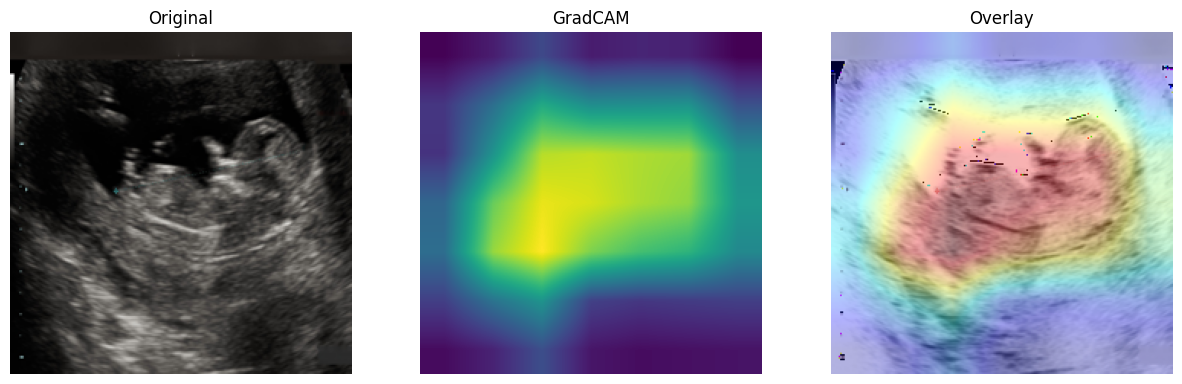

In [4]:
rnd_ind = random.randint(0, len(imgs))
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imgs[rnd_ind])
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gc[rnd_ind])
plt.title('GradCAM')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ogc[rnd_ind])
plt.title('Overlay')
plt.axis('off')

## Creating cropped images

In [5]:
@tf.function
def generate_gradcam_batch_withheat(imgs, fused_heatmaps, threshold):
    fused_heatmaps = tf.convert_to_tensor(fused_heatmaps, tf.float32)
    binary_masks = tf.where(fused_heatmaps > threshold, 1, 0)
    pooled_bin_mask = tf.nn.max_pool2d(binary_masks[:, :, :, tf.newaxis], ksize=(10, 10), strides=(1, 1), padding="SAME")[:, :, :, 0]
    pool_binary_masks = tf.stack([pooled_bin_mask] * 3, axis = -1)
    pool_binary_masks = tf.cast(pool_binary_masks, tf.float32)
    return pool_binary_masks

In [6]:
masks = generate_gradcam_batch_withheat(imgs, gc.astype('float32'), 0.75)

In [7]:
masks_np = np.array(masks)

In [8]:
print("Mask shape: ", masks_np.shape)

Mask shape:  (202, 224, 224, 3)


In [9]:
cropped_imgs = []
for i in range(len(masks_np)):
  cropped_imgs.append(imgs[i]/255. * masks_np[i])
cropped_imgs = np.array(cropped_imgs)
cropped_imgs.shape

(202, 224, 224, 3)

In [ ]:
for i in range(len(imgs)):
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 5, 1)
  plt.imshow(imgs[i])
  plt.title(f'Original - {i}')
  plt.axis('off')

  plt.subplot(1, 5, 2)
  plt.imshow(gc[i])
  plt.title('GradCAM')
  plt.axis('off')

  plt.subplot(1, 5, 3)
  plt.imshow(ogc[i])
  plt.title('Overlay')
  plt.axis('off')

  plt.subplot(1, 5, 4)
  plt.imshow(masks_np[i])
  plt.title('Mask')
  plt.axis('off')

  plt.subplot(1, 5, 5)
  plt.imshow(cropped_imgs[i])
  plt.title('Cropped image')
  plt.axis('off')


In [10]:
with open("/content/manual_annot_CRL_Sagittal.txt", "r") as file:
    # Read the contents of the file
    file_contents = file.read()

In [11]:
lines = file_contents.split('\n')
index = [int(i.split(' ')[0]) for i in lines]
labels = [' '.join(i.split(' ')[1:]) for i in lines]
manual_labels_df = pd.DataFrame()
manual_labels_df['Image ID'] = index
manual_labels_df['label'] = labels
manual_labels_df

,Image ID,label
0,0,neck
1,1,neck
2,2,head
3,3,head
4,4,body
...,...,...
197,197,remove
198,198,body
199,199,body
200,200,remove


In [12]:
id_label_mapping = dict(zip(manual_labels_df['Image ID'], manual_labels_df['label']))

In [13]:
id_label_mapping = {key: value.strip() for key, value in id_label_mapping.items()}

In [14]:
cluster_labels = list(set(id_label_mapping.values()))

In [15]:
print("Manually identified cluster labels: ", cluster_labels)

Manually identified cluster labels:  ['body', 'head', 'remove', 'neck']


In [16]:
labels = np.array([cluster_labels.index(i) for _, i in id_label_mapping.items()])

In [18]:
id_label_mapping

{0: 'neck',
 1: 'neck',
 2: 'head',
 3: 'head',
 4: 'body',
 5: 'body',
 6: 'body',
 7: 'body',
 8: 'body',
 9: 'body',
 10: 'remove',
 11: 'remove',
 12: 'neck',
 13: 'neck',
 14: 'neck',
 15: 'neck',
 16: 'body',
 17: 'body',
 18: 'head',
 19: 'head',
 20: 'body',
 21: 'body',
 22: 'body',
 23: 'body',
 24: 'body',
 25: 'body',
 26: 'body',
 27: 'body',
 28: 'body',
 29: 'body',
 30: 'head',
 31: 'head',
 32: 'head',
 33: 'head',
 34: 'body',
 35: 'body',
 36: 'body',
 37: 'body',
 38: 'neck',
 39: 'neck',
 40: 'head',
 41: 'head',
 42: 'head',
 43: 'head',
 44: 'body',
 45: 'body',
 46: 'head',
 47: 'head',
 48: 'neck',
 49: 'neck',
 50: 'body',
 51: 'body',
 52: 'neck',
 53: 'neck',
 54: 'body',
 55: 'body',
 56: 'head',
 57: 'head',
 58: 'head',
 59: 'head',
 60: 'head',
 61: 'head',
 62: 'head',
 63: 'head',
 64: 'neck',
 65: 'neck',
 66: 'neck',
 67: 'neck',
 68: 'neck',
 69: 'neck',
 70: 'body',
 71: 'body',
 72: 'neck',
 73: 'neck',
 74: 'body',
 75: 'body',
 76: 'body',
 77: 

In [19]:
imgs.shape

(202, 224, 224, 3)

In [20]:
to_remove = []
for i in range(imgs.shape[0]):
  if id_label_mapping[i] == 'remove':
    to_remove.append(i)

In [21]:
filtered_images_array = np.delete(imgs, to_remove, axis=0)

In [22]:
filtered_images_array.shape

(180, 224, 224, 3)

In [23]:
np.save('filtered_images_array.npy', filtered_images_array)

## 2D PCA

In [ ]:
gray_cropped_images = np.dot(cropped_imgs[..., :3], [0.2989, 0.5870, 0.1140])
gray_cropped_images.shape

(202, 224, 224)

In [ ]:
# cropped_imgs to train and test splits
x_train, x_test, y_train, y_test = tts(gray_cropped_images, labels)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(151, 224, 224)
(151,)
(51, 224, 224)
(51,)


<Axes: >

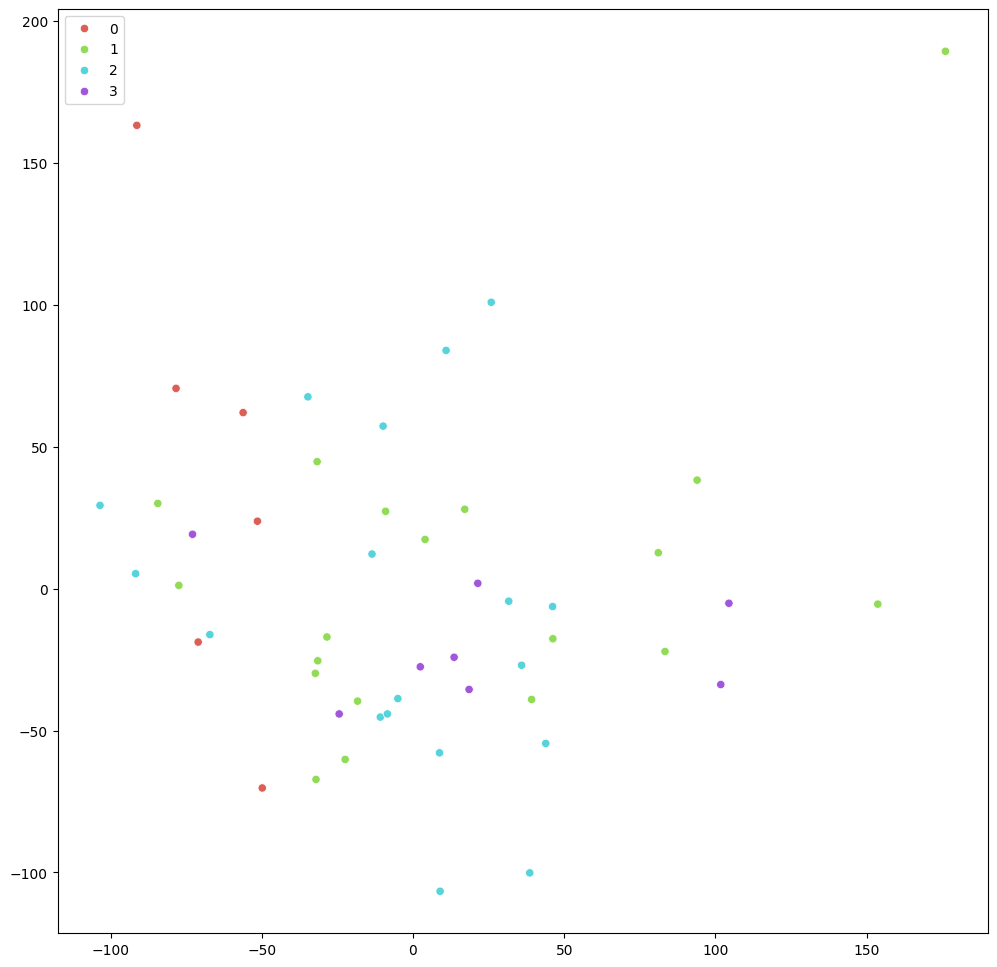

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Reshape datasets as NOBSERVATIONS x NPIXELS (Flatten):
train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

# Scale (Standardization)
train = StandardScaler().fit_transform(train)
test = StandardScaler().fit_transform(test)

# PROJECT TO A 2D PCA SPACE:
pca = PCA(n_components=2)
pca_proj = pca.fit_transform(test)

fig = plt.figure(figsize=(12,12))
sns.scatterplot(x = pca_proj[:,0], y = pca_proj[:,1], hue = y_test, palette = sns.hls_palette(4), legend = 'full')

In [ ]:
print('The size of flattened training data is {}'.format(train.shape))
print('The size of flattened test data is {}'.format(test.shape))
print('The size of the 2D PCA projection of the test data is {}'.format(pca_proj.shape))

The size of flattened training data is (151, 50176)
The size of flattened test data is (51, 50176)
The size of the 2D PCA projection of the test data is (51, 2)


In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.11786477, 0.21946936])

## t-SNE plot

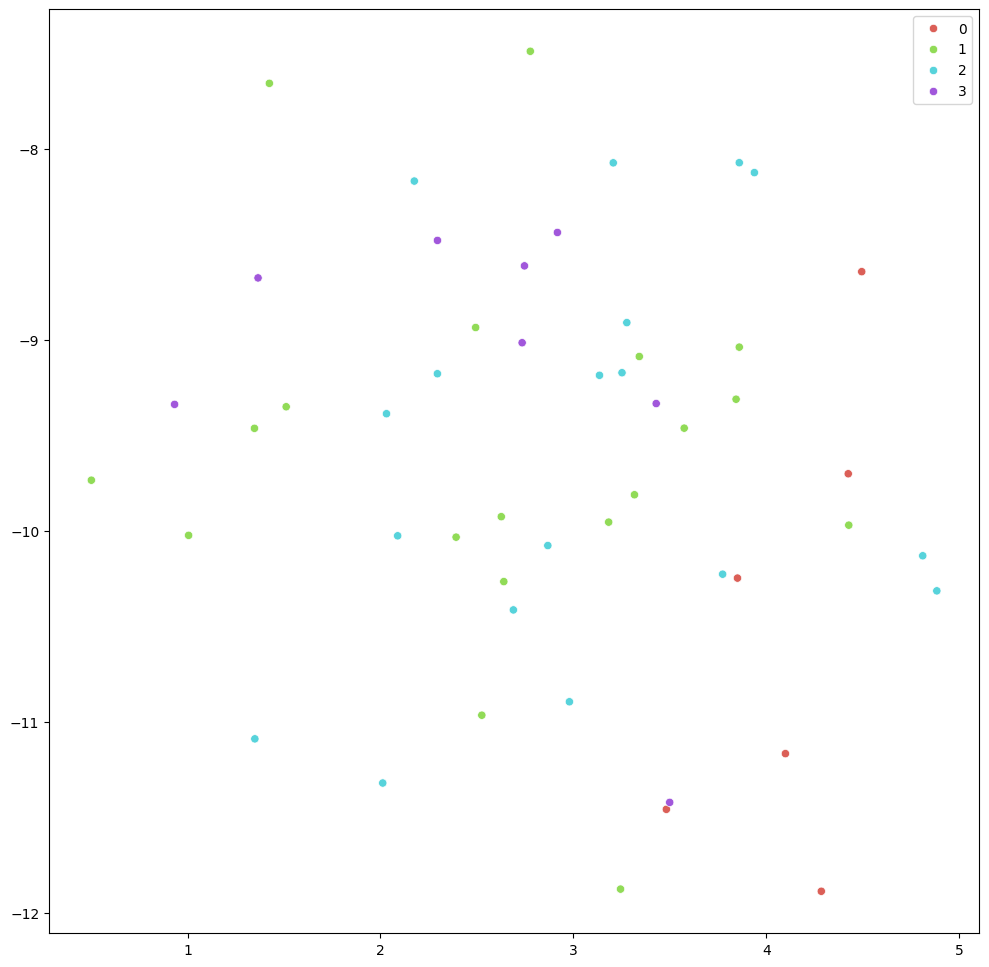

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(test)

fig = plt.figure(figsize=(12,12))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = y_test, palette = sns.hls_palette(4), legend = 'full');

## PCA + t-SNE

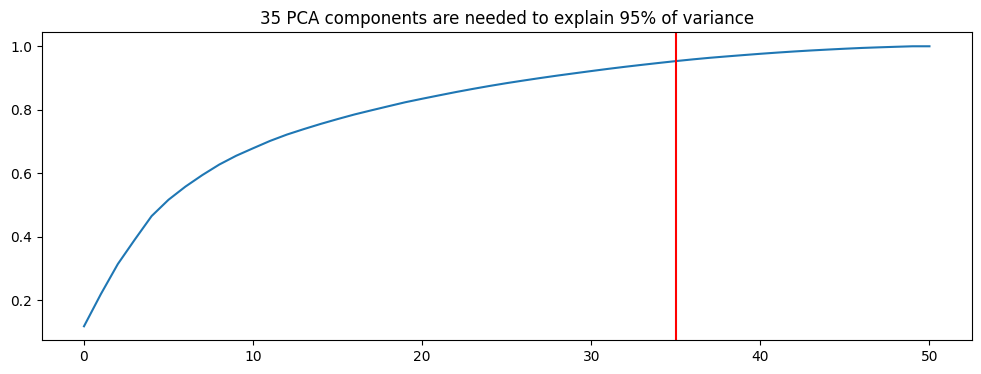

In [ ]:
pca_full = PCA(n_components=test.shape[0])
pca_full.fit(test)

cummulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Find number of components needed to explain 95% of variance:
ind = np.argwhere(cummulative_variance>0.95)
Ncomponents_95 = ind[0].item()

fig = plt.figure(figsize=(12,4))
plt.plot(cummulative_variance)
plt.axvline(Ncomponents_95,c='r')
plt.title('{} PCA components are needed to explain 95% of variance'.format(Ncomponents_95))
plt.show()

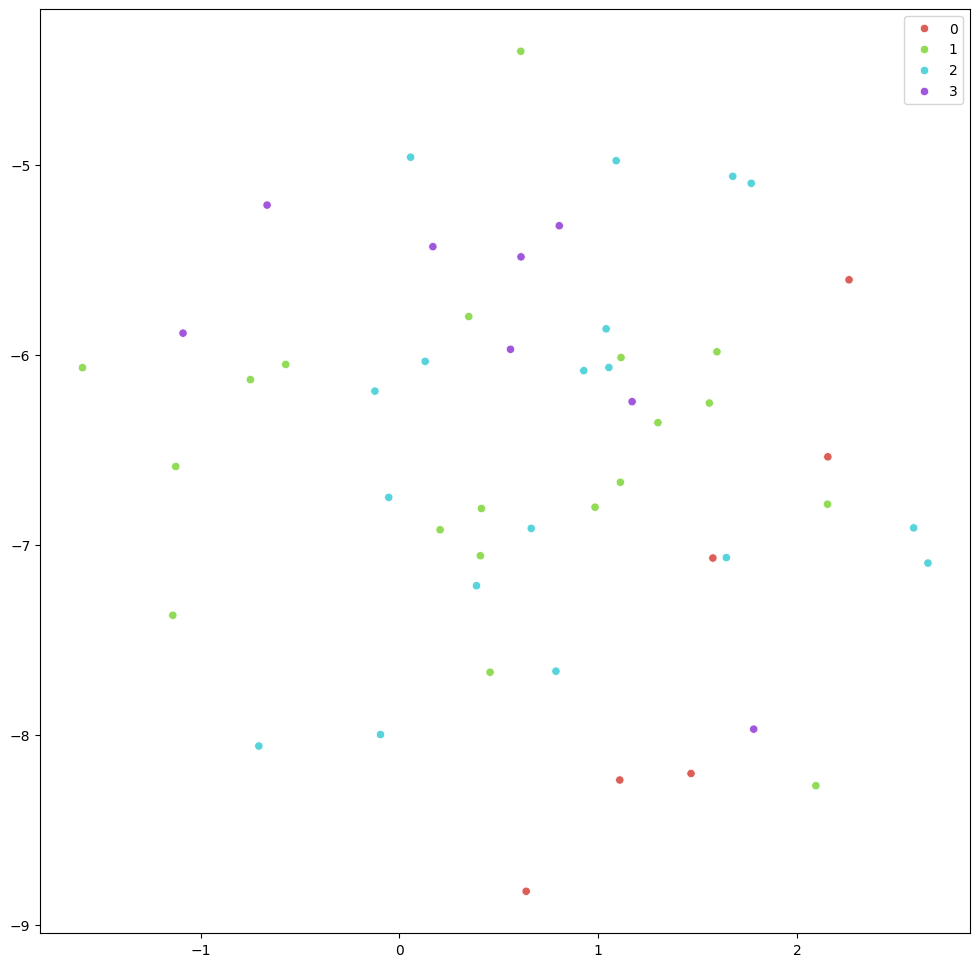

In [ ]:
pca95 = PCA(n_components=Ncomponents_95)
pca95_proj = pca95.fit_transform(test)

tsne = TSNE(n_components = 2, random_state=0)
tsne_pca = tsne.fit_transform(pca95_proj)
# np.savez(folder_data+'/tsne.npz', tsne_pca,tsne_res)

fig = plt.figure(figsize=(12,12))
sns.scatterplot(x = tsne_pca[:,0], y = tsne_pca[:,1], hue = y_test, palette = sns.hls_palette(4), legend = 'full');

## U-MAP

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=5bc4efc683b4dd9016c63d0cb3927fe3be1415bf02808b4e7e803e01eeaf7114
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import umap
import pickle

mapper = umap.UMAP().fit(test) # create the UMAP mapper
embedding = mapper.transform(test) # project data
# np.savez(folder_data+'/umap.npz', embedding)
# pickle.dump(mapper, open(folder_data+'/umap_mapper.sav', 'wb'))

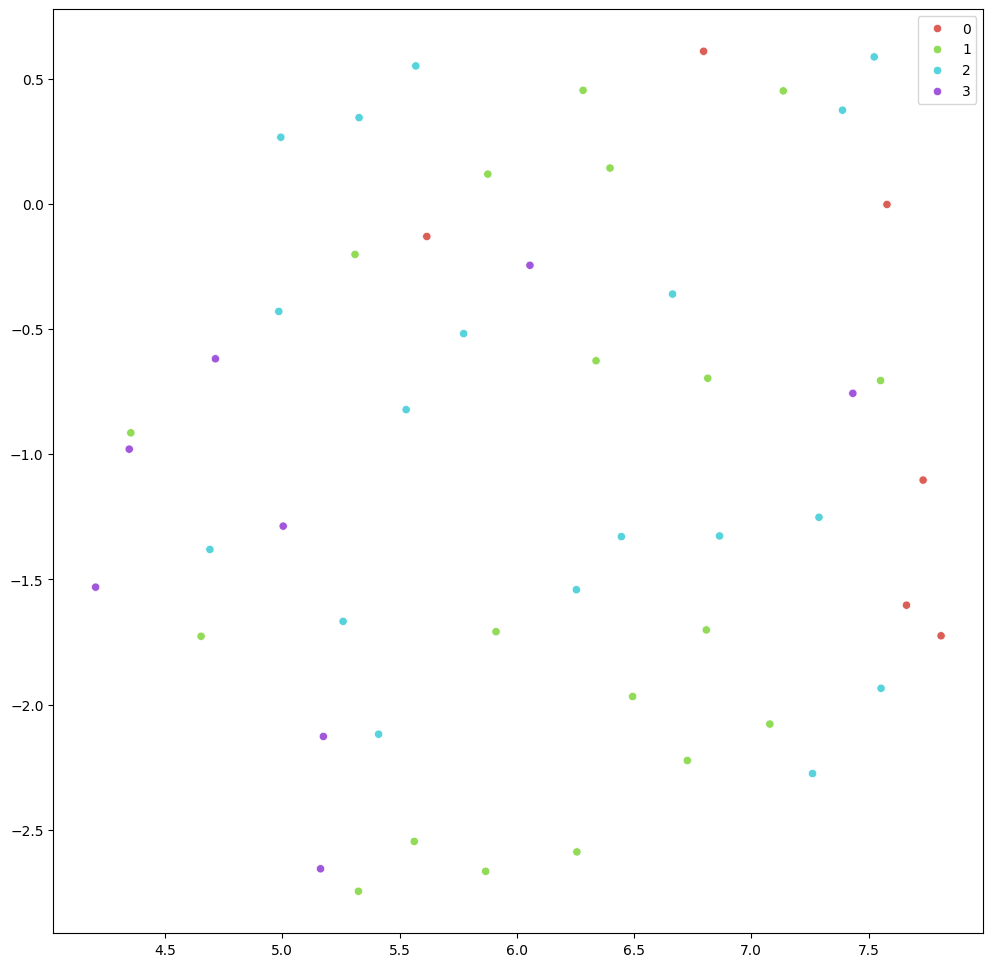

In [ ]:
fig = plt.figure(figsize=(12,12))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1], hue = y_test, palette = sns.hls_palette(4), legend = 'full');